In [1]:
######################################################
######### 랜덤 포레스트와 극단 랜덤 포레스트 #########
######################################################

In [2]:
import argparse

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from utilities import visualize_classifier

In [35]:
# 입력 인수 처리기
def build_arg_parser():
    parser = argparse.ArgumentParser(description='Classify data using Ensemble Learning techniques')
    parser.add_argument('--classifier-type', dest='classifier_type',required=True, choices=['rf', 'erf'], help="Type of Classifier to use; can be either 'rf' or 'erf'")
    return parser

if __name__ == '__main__':
    # 입력 인수 처리하기
    args = build_arg_parser().parse_args()
    classifier_type = args.classifier_type

usage: ipykernel_launcher.py [-h] --classifier-type {rf,erf}
ipykernel_launcher.py: error: the following arguments are required: --classifier-type


SystemExit: 2

In [28]:

# 입력 인수 처리기
def build_arg_parser():
    parser = argparse.ArgumentParser(description='Classify data using Ensemble Learning techniques')
    parser.add_argument("--classifier-type", dest = 'classifier_type',required=True, choices=['rf', 'erf'], help="Type of Classifier to use; can be either 'rf' or 'erf'")
    return parser


if __name__=='__main__':
    #입력 인수 처리하기
    args = build_arg_parser().parse_args()
    classifier_type = args.classifier_type

usage: ipykernel_launcher.py [-h] --classifier-type {rf,erf}
ipykernel_launcher.py: error: the following arguments are required: --classifier-type


SystemExit: 2

In [11]:
# 입력 데이터 가져오기
input_file = 'C:\\Users\\customer\\Desktop\\머신러닝 공부\\Artificial_Intelligence_with_Python_Code\\Chapter 3\\code\\data_random_forests.txt'
data = np.loadtxt(input_file, delimiter= ',')
x, y = data[:,:-1], data[:, -1]

Text(0.5, 1.0, 'Input data')

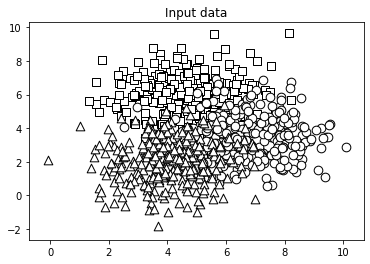

In [15]:
# 세 가지 레이블 값에 따라 데이터를 분리
Class_0 = np.array(x[y==0])
Class_1 = np.array(x[y==1])
Class_2 = np.array(x[y==2])

# 입력 데이터 시각화
plt.figure()
plt.scatter(Class_0[:,0], Class_0[:,1], s=75, facecolors = 'white', edgecolors='black', linewidth=1, marker='s')
plt.scatter(Class_1[:,0], Class_1[:,1], s=75, facecolors = 'white', edgecolors='black', linewidth=1, marker='o')
plt.scatter(Class_2[:,0], Class_2[:,1], s=75, facecolors = 'white', edgecolors='black', linewidth=1, marker='^')
plt.title("Input data")

In [40]:
# 학습 데이터와 테스트 데이터로 나누기
from sklearn.model_selection import train_test_split


x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=5)

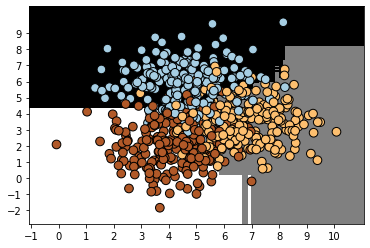

In [65]:
#앙상블학습 분류기
params = {'n_estimators':100, 'max_depth':4, 'random_state':0}

classifier = RandomForestClassifier(**params)
Extra_classifier = ExtraTreesClassifier(**params)

classifier.fit(x_train, y_train)
visualize_classifier(classifier, x_train, y_train)


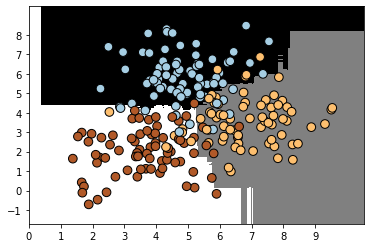

In [45]:
# 테스트 데이터 에측 및 시각화

y_test_pred = classifier.predict(x_test)
visualize_classifier(classifier, x_test, y_test)


In [47]:
# 분류기 성능 평가
class_names = ['Class-0', 'Class-1', 'Class-2']
print("\n"+ "#"*40)
print("\nClassifier Performance on Training Dataset\n")
print(classification_report(y_train,classifier.predict(x_train), target_names = class_names))
print("#"*40 + "\n")

print("\n"+ "#"*40)
print("\nClassifier Performance on Test Dataset\n")
print(classification_report(y_test,y_test_pred, target_names = class_names))
print("#"*40 + "\n")



########################################

Classifier Performance on Training Dataset

              precision    recall  f1-score   support

     Class-0       0.91      0.86      0.88       221
     Class-1       0.84      0.87      0.86       230
     Class-2       0.86      0.87      0.86       224

    accuracy                           0.87       675
   macro avg       0.87      0.87      0.87       675
weighted avg       0.87      0.87      0.87       675

########################################


########################################

Classifier Performance on Test Dataset

              precision    recall  f1-score   support

     Class-0       0.92      0.85      0.88        79
     Class-1       0.86      0.84      0.85        70
     Class-2       0.84      0.92      0.88        76

    accuracy                           0.87       225
   macro avg       0.87      0.87      0.87       225
weighted avg       0.87      0.87      0.87       225

##########################

In [53]:
# 예측 신뢰도 측정하기

#신뢰도 계산
test_datapoints = np.array([[5,5], [3,6], [6,4],[7,2], [4,4], [5,2]])

print("\nConfidence measure:")
for datapoint in test_datapoints:
    probabilities = classifier.predict_proba([datapoint])[0]
    predicted_class = 'Class-' + str(np.argmax(probabilities))
    print("\nDatapoint:", datapoint)
    print('Probabilities:', probabilities)
    print('Predicted class:', predicted_class)


Confidence measure:

Datapoint: [5 5]
Probabilities: [0.81427532 0.08639273 0.09933195]
Predicted class: Class-0

Datapoint: [3 6]
Probabilities: [0.93574458 0.02465345 0.03960197]
Predicted class: Class-0

Datapoint: [6 4]
Probabilities: [0.12232404 0.7451078  0.13256816]
Predicted class: Class-1

Datapoint: [7 2]
Probabilities: [0.05415465 0.70660226 0.23924309]
Predicted class: Class-1

Datapoint: [4 4]
Probabilities: [0.20594744 0.15523491 0.63881765]
Predicted class: Class-2

Datapoint: [5 2]
Probabilities: [0.05403583 0.0931115  0.85285267]
Predicted class: Class-2


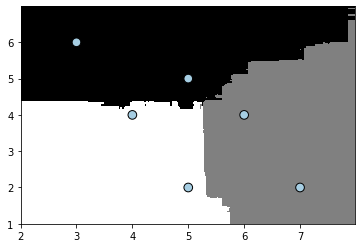

In [56]:
visualize_classifier(classifier, test_datapoints,[0]*len(test_datapoints))
plt.show()

In [64]:
probabilities = classifier.predict_proba([test_datapoints[0]])
print(probabilities)
np.argmin(probabilities)
print("\nDatapoint:", test_datapoints[0])

[[0.81427532 0.08639273 0.09933195]]

Datapoint: [5 5]


In [67]:
# 클래스별 데이터 불균형 처리(클래스별 데이터 수의 차이가 심할 경우)

import sys

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from utilities import visualize_classifier

In [68]:
# 입력 데이터 가져오기
input_file = 'C:\\Users\\customer\\Desktop\\머신러닝 공부\\Artificial_Intelligence_with_Python_Code\\Chapter 3\\code\\data_imbalance.txt'
data = np.loadtxt(input_file, delimiter = ',')
x, y = data[:,:-1], data[:, -1]

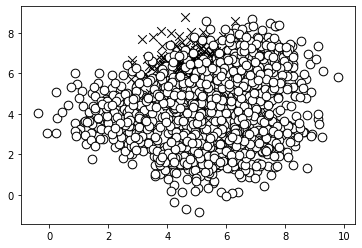

In [88]:
# 입력 데이터를 레이블에 따라 두 개의 클래스로 분리
class_0 = np.array(x[y==0])
class_1 = np.array(x[y==1])

# 입력 데이터 시각화
plt.scatter(class_0[:,0],class_0[:,1], s=75, facecolors='black', edgecolors='black',linewidth=1, marker='x')
plt.scatter(class_1[:,0],class_1[:,1], s=75, facecolors='white', edgecolors='black',linewidth=1, marker='o')



In [89]:
# 데이터를 학습 및 테스트 데이터셋으로 분할
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state = 5)

In [90]:
#극단 랜덤 포레스트 분류기
params = {'n_estimators': 100, 'max_depth':4, 'random_state': 0}

if len(sys.argv) >1:
    if sys.argv[1] == 'balance':
        params = {'n_estimators': 100, 'max_depth':4, 'random_state': 0, 'class_weight':'balanced'}
    else:
        raise TypeError("Invalid input argumnet; should be 'balance'")

TypeError: Invalid input argumnet; should be 'balance'

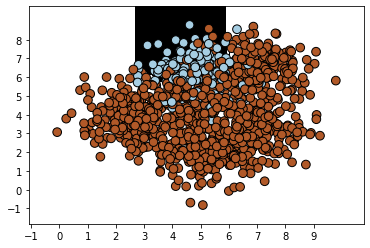

In [91]:
classiier = ExtraTreesClassifier(**params)
classifier.fit(x_train,y_train)
visualize_classifier(classifier,x_train,y_train)

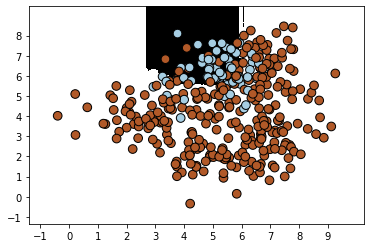

In [92]:
y_test_pred = classifier.predict(x_test)
visualize_classifier(classifier,x_test,y_test)

In [95]:
## 분류기 성능 평가
Class_name = ["Class-0", "Class-1"]
print("\n"+"#"*40)
print("\n Classifier Performance on training dataset")
print(classification_report(y_train,classifier.predict(x_train),target_names = Class_name))
print("#"*40+"\n")

print("\n"+"#"*40)
print("\n Classifier Performance on test dataset")
print(classification_report(y_test,classifier.predict(x_test),target_names = Class_name))
print("#"*40+"\n")




########################################

 Classifier Performance on training dataset
              precision    recall  f1-score   support

     Class-0       0.70      0.65      0.67       181
     Class-1       0.93      0.95      0.94       944

    accuracy                           0.90      1125
   macro avg       0.82      0.80      0.81      1125
weighted avg       0.90      0.90      0.90      1125

########################################


########################################

 Classifier Performance on test dataset
              precision    recall  f1-score   support

     Class-0       0.69      0.70      0.69        69
     Class-1       0.93      0.93      0.93       306

    accuracy                           0.89       375
   macro avg       0.81      0.81      0.81       375
weighted avg       0.89      0.89      0.89       375

########################################



In [99]:
# 그리드 검색을 사용해 최적의 학습 매개변수 찾기

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

from utilities import visualize_classifier


In [101]:
# 입력 데이터 가져오기
input_file = "C:\\Users\\customer\\Desktop\\머신러닝 공부\\Artificial_Intelligence_with_Python_Code\\Chapter 3\\code\\data_random_forests.txt"
data = np.loadtxt(input_file,delimiter=',')
x, y = data[:,:-1], data[:,-1]

In [102]:
# 레이블을 기준으로 데이터를 세 가지 클래스로 나눈다.
class_0 = np.array(x[y==0])
class_1 = np.array(x[y==1])
class_2 = np.array(x[y==2])

# 데이터를 학습 데이터와 테스트 데이터로 나눈다.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=5)

In [103]:
# 매개변수 범위 지정
parameter_grid = [{'n_estimators': [100], 'max_depth':[2, 4, 7, 12, 16]}, {'max_depth': [4], 'n_estimators': [25,50,100,25]}]

metrics = ['precision_weighted', 'recall_weighted']

In [105]:
for metric in metrics:
    print("\n#### Searching optimal parameters for", metric)
    
    classifier = GridSearchCV(ExtraTreesClassifier(random_state=0), parameter_grid, cv=5, scoring=metric)
    classifier.fit(x_train,y_train)




#### Searching optimal parameters for precision_weighted

#### Searching optimal parameters for recall_weighted


In [106]:
print("\nGrid scores for the parameter grid:")
for params, avg_score, _ in classifier.grid_scores_:
    print(params,'-->', round(avg_score,3))


Grid scores for the parameter grid:


AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [107]:
y_pred = classifier.predict(x_test)
print("\nPerformance report:\n")
print(classification_report(y_test,y_pred))


Performance report:

              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87        79
         1.0       0.81      0.86      0.83        70
         2.0       0.83      0.91      0.87        76

    accuracy                           0.86       225
   macro avg       0.86      0.86      0.86       225
weighted avg       0.86      0.86      0.86       225

